In [1]:
import pandas as pd
import sqlite3

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [2]:
con = sqlite3.connect('data.db')

In [3]:
cur = con.cursor()

articles_per_day = con.execute('select date, count(*) from article group by date order by date;')
articles_per_day = list(articles_per_day)

df = pd.DataFrame(articles_per_day, columns=['date', 'number_of_articles']).set_index('date')
df.head()

,number_of_articles
date,
2000-03-01,2
2003-07-15,1
2003-07-16,1
2003-07-21,1
2003-07-22,1


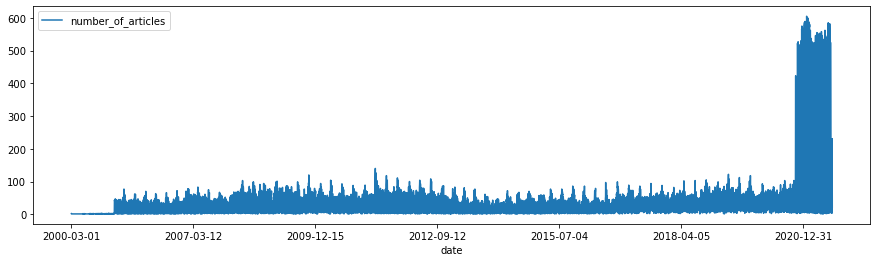

In [4]:
df.plot(figsize=(15,4));

In [5]:
# on 20 August 2020 Apple reaches $2 billion market cap

articles = [*con.execute('select * from article where date="2020-08-19";')]
len(articles)

67

In [6]:
con.close()

In [ ]:
df = pd.DataFrame(articles, columns=['idx', 'title', 'text', 'href', 'date']).drop(columns='idx')
df.head()

In [ ]:
mask = df.title.str.contains("Apple")
for row in df[mask].itertuples():
    print(row.Index, row.title)

In [ ]:
print(df.loc[2,'text'])

In [ ]:
len(df.loc[2,'text'].split())

In [ ]:
df['text_size'] = df['text'].apply(lambda x: len(x.split()))
df.head()

In [ ]:
df.sort_values(by='text_size', ascending=False)

In [ ]:
df['text_size'].hist();

In [ ]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [ ]:
sentences = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong but we do not have liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results = nlp(sentences)
print(results)

In [ ]:
results

In [ ]:
token = df.sample()
token

In [ ]:
token = [token.title.item(), token.text.item()]
token

In [ ]:
results = nlp(token)
print(results)

In [ ]:
print(token[1])

In [ ]:
df.loc[64]['href']

In [ ]:
nlp("These stocks performed best in May as the market rally continued")